# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found at [input_file](./input_files/yocp_quickstart.yaml).


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess

In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_quickstart.yaml')

The above commands imported the required libraries and defined the file path to our input file. 

Let's now run the simulation

In [3]:
# from sarkas.processes import PreProcess
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [4]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
Simulation directory: 
SarkasSimulations/yocp_quickstart/Simulation

Equilibration dumps directory: 
Sarkas

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 0 min 56 sec


------------------------------Production------------------------------ 



  0%|          | 0/10000 [00:00<?, ?it/s]


Production Time: 0 hrs 0 min 55 sec

Total Time: 0 hrs 1 min 52 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 0 MB 85 KB 670 bytes
	Checkpoint folder size: 0 GB 83 MB 662 KB 304 bytes
Production:
	Checkpoint filesize: 0 GB 0 MB 85 KB 670 bytes
	Checkpoint folder size: 0 GB 83 MB 662 KB 304 bytes

Total occupied space: 0 GB 167 MB 300 KB 608 bytes


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. 
The following lines which will initialize the `PostProcess` class and read the parameters of the simulation.

In [5]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)







 __            _             
/ _\ __ _ _ __| | ____ _ ___ 
\ \ / _` | '__| |/ / _` / __|
_\ \ (_| | |  |   < (_| \__ \
\__/\__,_|_|  |_|\_\__,_|___/
                             


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PostProcessing directory: 
SarkasSimulations/yocp_quickstart/PostProcessing

Equilibration dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/EquilibrationEnergy_yocp_quickstart.csv
Production Ther

Let's check the temperature and energy

In [6]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 1000
Total time per block: T = 5.0000e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period


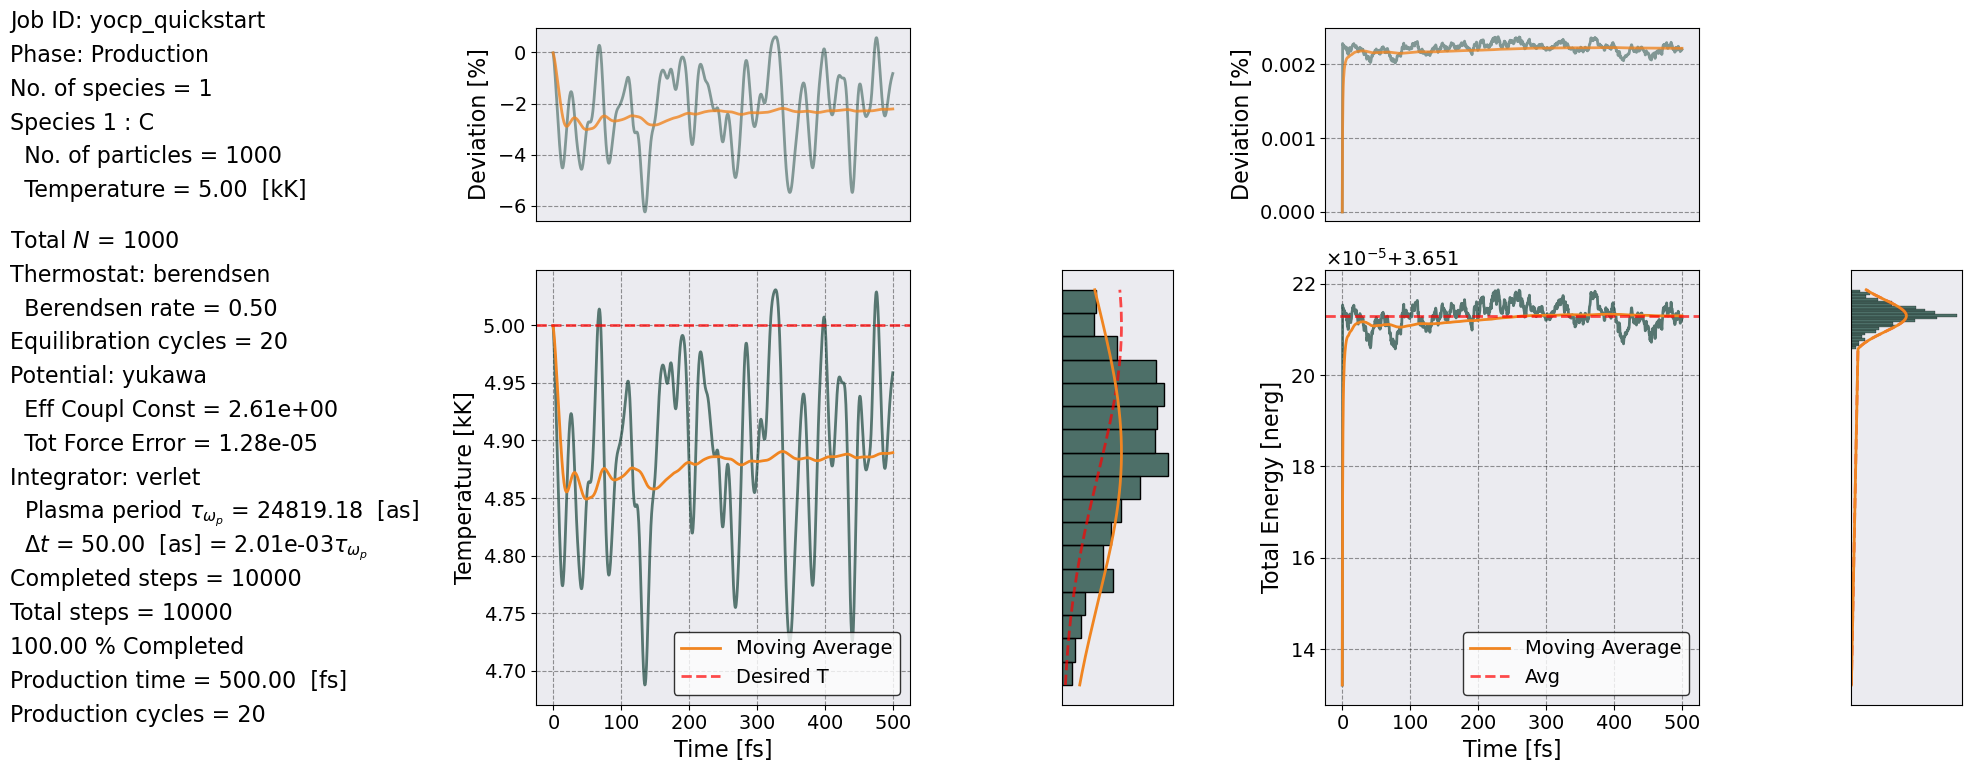

In [8]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.temp_energy_plot(postproc)

Noice! The temperature (left plots) and total energy (plots on the right) are both conserved in the production phase. They do oscillate widly, but this is fine as long as the deviation percentages are within an accepted range. 

The deviation percentages (top plots) are calculated as

$$\Delta T(t) = \frac{T(t) - T_{\rm desired}}{T_{\rm desired}}, \quad \Delta E = \frac{E(t) - E(t = 0)}{E(t = 0)} \times 100. $$ 

___
## Observables

The most common observable is the radial distribution function, _i.e._ $g(r)$. This can be calculated using the following code.

In [9]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0187 a_ws = 2.4000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.6852 a_ws = 6.0000e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 1000
Total time per block: T = 5.0000e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 21 msec 951 usec 959 nsec


In [10]:
# Let's look at the data 
rdf.dataframe.head()

Interparticle C-C RDF    
       Distance    Mean Std
0  0.000000e+00     0.0 NaN
1  3.600000e-10     0.0 NaN
2  6.000000e-10     0.0 NaN
3  8.400000e-10     0.0 NaN
4  1.080000e-09     0.0 NaN

The RDF is computed and stored in a `pandas.DataFrame`. The columns `Mean` and `Std` refer to the subdivision of the simulation data. We will explain this in another notebook. For now let's make a plot.

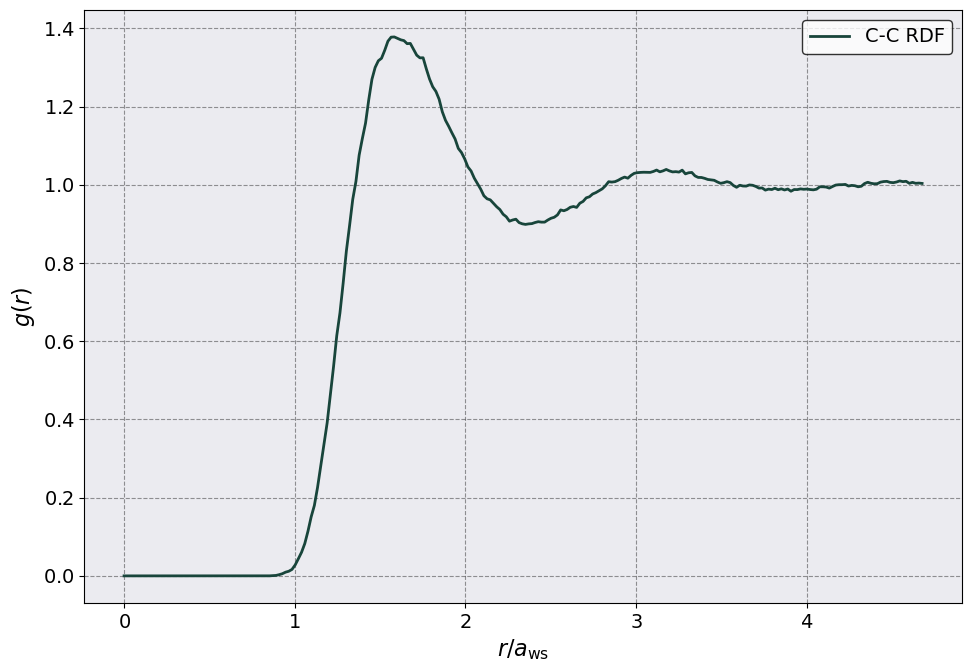

In [11]:
# Let's make a plot
ax = rdf.plot(
    scaling=rdf.a_ws,
    y = [("C-C RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$'
)
ax.legend(["C-C RDF"])

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.